#  气象数据分析

*吴凡璐  中央财经大学 2018210803*

> **背景：**  
该数据集来源于美国国家气象局，记录了二战期间分布在世界各地的气象站记录的天气信息。包括降水，降雪，风速，当天是否有雷电及其他不良天气条件。原来是用来协助分析与设计空中轰炸系统的，在本次作业中要求根据记录的天气信息，预测所在的地理位置。

## 1. 数据集介绍

案例中包含两个数据集：
- **Weather Station locations**  
各个气象站所处的地理位置，包括站点编号，名字，国家和经纬度等信息；
- **Summary of weather**  
每个气象站在1940年到1945年期间每天记录的各个气象指标的值。

将两个数据集关联起来的键是气象站的编号，即Weather Station locations中的**WBAN**和Summary of weather中的**STA**。

## 2. 数据预处理

In [107]:
# 加载需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
os.getcwd()  # 查看工作路径，把数据放到工作路径下
weather_data = pd.read_csv('Summary of Weather.csv')  # 载入数据

'C:\\Users\\wufan\\Documents\\王成章python课件'

In [9]:
# 查看数据前几条
weather_data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 查看定量变量分布
weather_data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [13]:
# 查看分类变量分布情况
weather_data.describe(include=[np.object])

,Date,Precip,Snowfall,PoorWeather,PRCP,SNF,TSHDSBRSGF
count,119040,119040,117877.0,34237,117108,117877.0,34237
unique,2192,540,42.0,39,540,42.0,39
top,1945-4-22,0,0.0,1,0,0.0,1
freq,122,64267,86090.0,25846,62335,86090.0,25846


通过对数据基本的描述性分析，我们可以发现，数据中存在大量的缺失值，需要对缺失值进行处理

In [28]:
print ('有%d条数据'%weather_data.shape[0],'共有%d个变量'%weather_data.shape[1])
print ('--'*30)
print ('每个变量缺失值比例为（百分数）：')
print (weather_data.isnull().sum()/weather_data.shape[0])

有119040条数据 共有31个变量
------------------------------------------------------------
每个变量缺失值比例为（百分数）：
STA            0.000000
Date           0.000000
Precip         0.000000
WindGustSpd    0.995531
MaxTemp        0.000000
MinTemp        0.000000
MeanTemp       0.000000
Snowfall       0.009770
PoorWeather    0.712391
YR             0.000000
MO             0.000000
DA             0.000000
PRCP           0.016230
DR             0.995523
SPD            0.995531
MAX            0.003982
MIN            0.003931
MEA            0.004183
SNF            0.009770
SND            0.953268
FT             1.000000
FB             1.000000
FTI            1.000000
ITH            1.000000
PGT            0.995590
TSHDSBRSGF     0.712391
SD3            1.000000
RHX            1.000000
RHN            1.000000
RVG            1.000000
WTE            1.000000
dtype: float64


从上表可以看出，部分变量缺失数据较多，不宜加入分析，因此需要删除一部分变量，将缺失值比例大于70%的变量剔除

In [33]:
cols=[col for col in weather_data.columns if (weather_data[col].isnull().sum()/weather_data.shape[0]*100<70)]
weather_data1=weather_data[cols]

由于MAX,MIN,MEA是用华氏温度衡量的气温，和MaxTemp,MinTemp,MeanTemp含义重复，删去这三个变量

In [36]:
weather_data1=weather_data1.drop(['MAX','MIN','MEA'],axis=1)

In [57]:
# 处理Precip、PRCP中的字符'T'
weather_data1['Precip']=weather_data1['Precip'].replace(['T'],np.nan)
weather_data1['PRCP']=weather_data1['PRCP'].replace(['T'],np.nan)
# 由于含有缺失值的行数不多，直接将之剔除
weather_data1.dropna(inplace=True)

In [214]:
# 确认是否有缺失值
weather_data1.dropna(inplace=True)
weather_data1.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
SNF         0
dtype: int64

In [215]:
# 查看变量的数据类型
weather_data1.dtypes

STA                  int64
Date        datetime64[ns]
Precip             float64
MaxTemp            float64
MinTemp            float64
MeanTemp           float64
Snowfall           float64
YR                   int64
MO                   int64
DA                   int64
PRCP               float64
SNF                float64
dtype: object

有些定量变量由于之前数据存储中带有字符的原因，被当做了字符型变量，在删除了字符数据后需要将之转换为正确的数据类型

In [216]:
# 数据类型转换
weather_data1['Snowfall'] = pd.to_numeric(weather_data1['Snowfall'], errors='coerce')
weather_data1['SNF'] = pd.to_numeric(weather_data1['SNF'], errors='coerce')
weather_data1['PRCP'] = pd.to_numeric(weather_data1['PRCP'], errors='coerce')
weather_data1['Precip'] = pd.to_numeric(weather_data1['Precip'], errors='coerce')
weather_data1['Date'] = pd.to_datetime(weather_data1['Date'])

In [217]:
# 查看数据类型
weather_data1.dtypes

STA                  int64
Date        datetime64[ns]
Precip             float64
MaxTemp            float64
MinTemp            float64
MeanTemp           float64
Snowfall           float64
YR                   int64
MO                   int64
DA                   int64
PRCP               float64
SNF                float64
dtype: object

选取待分析的变量:并不是所有变量都值得我们分析，可能存在变量相关性过高，替代性较强的情况，对于这些变量要进行删除选择。而有的变量需要进行重编码，比如月份的信息，将之转换成季度再进行分析。

In [249]:
# 删除对分析没有帮助的变量，如YR,DA
df1=weather_data1.copy()
df1.drop(['YR','DA'],axis=1,inplace=True)
print (list(df1.columns))

['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'MO', 'PRCP', 'SNF']


In [250]:
# 查看变量相关系数
df1[[ 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall','PRCP', 'SNF']].corr()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,SNF
Precip,1.000000,-0.009805,0.097577,0.044556,-0.010960,1.000000,-0.010960
MaxTemp,-0.009805,1.000000,0.859969,0.964718,-0.326502,-0.009805,-0.326502
MinTemp,0.097577,0.859969,1.000000,0.960033,-0.306342,0.097577,-0.306342
MeanTemp,0.044556,0.964718,0.960033,1.000000,-0.326848,0.044556,-0.326848
Snowfall,-0.010960,-0.326502,-0.306342,-0.326848,1.000000,-0.010960,1.000000
PRCP,1.000000,-0.009805,0.097577,0.044556,-0.010960,1.000000,-0.010960
SNF,-0.010960,-0.326502,-0.306342,-0.326848,1.000000,-0.010960,1.000000


In [251]:
# 删除变量
  # PRCP 和Precip的相关系数为1，删除PRCP 
  # MinTemp,MaxTemp,MeanTemp之间相关系数较大，只保留MeanTemp
  # SNF与Snowfall相关系数为1，完全替代，删除SNF
df1.drop(['PRCP','MinTemp','MaxTemp','SNF'],axis=1,inplace=True)
# 转换月份数据为季节数据
dict={3:1,4:1,5:1,
      6:2,7:2,8:2,
      9:3,10:3,11:3,
      12:4,1:4,2:4}  # 创建映射字典
df1['MO']=df1['MO'].map(dict)
#df1['MO'].describe()
# 哑变量重编码
from sklearn import preprocessing
dummy_SE=pd.get_dummies(df1['MO'],prefix='SE')
df=pd.merge(df1,dummy_SE,right_index=True,left_index=True) # 以索引为键连接
df.drop(['MO','SE_4','Date'],axis=1,inplace=True)   #  python自动生成的哑变量多了一个，删除SE_4

In [252]:
df.head() # 展示处理完的数据

,STA,Precip,MeanTemp,Snowfall,SE_1,SE_2,SE_3
0,10001,1.016,23.888889,0.0,0,1,0
1,10001,0.000,25.555556,0.0,0,1,0
2,10001,2.540,24.444444,0.0,0,1,0
3,10001,2.540,24.444444,0.0,0,1,0
4,10001,0.000,24.444444,0.0,0,1,0


In [253]:
print (list(df.columns))

['STA', 'Precip', 'MeanTemp', 'Snowfall', 'SE_1', 'SE_2', 'SE_3']


In [254]:
# 载入数据集Weather Station Locations
df2=pd.read_csv('Weather Station Locations.csv')
#print (df2[np.argsort(df2[:,7])])
#dat = df2[np.argsort(df2[2])] 
#np.argsort(df2[])
df2.drop(['NAME','STATE/COUNTRY ID','LAT','LON'],axis=1,inplace=True)
df2.head()

,WBAN,ELEV,Latitude,Longitude
0,33013,611,36.383333,6.650000
1,33031,88,35.616667,0.583333
2,33023,23,36.716667,3.216667
3,33044,754,36.116667,6.416667
4,12001,443,27.683333,-8.083333


In [225]:
# 查看数据中是否有异常值
df2['ELEV'].describe()

count     161.000000
mean      439.850932
std      1745.422339
min         1.000000
25%         9.000000
50%        27.000000
75%        98.000000
max      9999.000000
Name: ELEV, dtype: float64

数据中最大值9999，考虑为在不知道数据为多少情况的异常值，将之用nan代替后用列中的均值插补

In [226]:
# 用均值插补后的ELEV
df2['ELEV'].replace(9999,np.nan,inplace=True)
df2['ELEV'].fillna(df2['ELEV'].mean(),inplace=True)
df2['ELEV'].describe()

count     161.000000
mean      133.467949
std       315.331223
min         1.000000
25%         9.000000
50%        27.000000
75%        98.000000
max      2326.000000
Name: ELEV, dtype: float64

## 3. 描述性分析

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,SNF,SE_1,SE_2,SE_3,Latitude
88813,5.080,34.444444,25.555556,30.000000,0.00,0.20,0.0,0,1,0,-2.766667
53885,0.000,31.666667,19.444444,25.555556,0.00,0.00,0.0,0,1,0,12.950000
11822,0.000,33.333333,24.444444,28.888889,0.00,0.00,0.0,1,0,0,8.366667
64765,6.096,21.666667,12.222222,16.666667,0.00,0.24,0.0,0,0,0,27.483333
39452,0.000,-7.222222,-10.000000,-8.888889,35.56,0.00,1.4,1,0,0,60.683333


No handles with labels found to put in legend.
C:\Users\wufan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of Longitude')

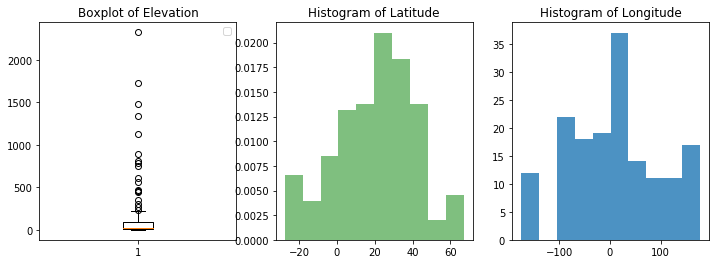

In [230]:
import numpy as np
import matplotlib.pyplot as plt
n_bins = 10
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax0, ax1, ax2= axes.flat
ax0.boxplot(df2['ELEV'])
ax0.legend(prop={'size': 10})
ax0.set_title('Boxplot of Elevation')
ax1.hist(df2['Latitude'], n_bins, normed=1,color='green',alpha=0.5)
ax1.set_title('Histogram of Latitude')
ax2.hist(df2['Longitude'], n_bins,alpha=0.8)
ax2.set_title('Histogram of Longitude')

观察因变量数据后发现，只有纬度Latitude基本服从正态分布，选择纬度作为回归的因变量

下面对自变量降水Precip,MeanTemp,Snowfall进行可视化

C:\Users\wufan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


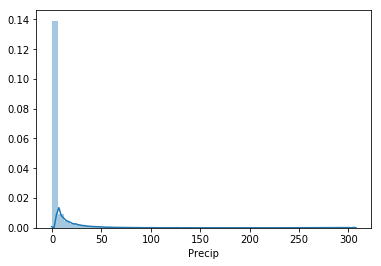

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
#ax0, ax1, ax2= axes.flat
#fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.distplot(df['Precip'])

C:\Users\wufan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


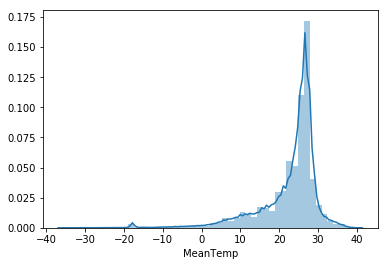

In [163]:
sns.distplot(df['MeanTemp'])

由于snowfall里绝大部分数据为0，只有少部分数据不为0，特关注不为0的数据的分布状况

In [178]:
# 统计不为0的数据个数
c0=df['Snowfall'][df['Snowfall']>0].shape[0]
print ('snowfall中不为0的数据有',c0,'个')

snowfall中不为0的数据有 1630 个


C:\Users\wufan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


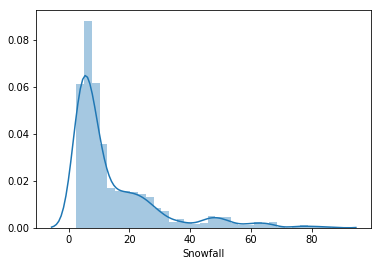

In [179]:
# 不为0的snowfall数据的分布状况
sns.distplot(df['Snowfall'][df['Snowfall']>0])

In [205]:
df['Snowfall'].isnull().sum()

23

In [255]:
# 将2个数据集合并
data=pd.merge(df,df2,left_on='STA',right_on='WBAN')
data.drop(['STA','WBAN','ELEV','Longitude'],axis=1,inplace=True)
data.sample(5) # 随机查看合并后的数据集记录

,Precip,MeanTemp,Snowfall,SE_1,SE_2,SE_3,Latitude
70249,24.130,11.666667,0.0,0,0,0,37.450000
96223,0.000,21.666667,0.0,0,1,0,-20.683333
79527,2.540,26.111111,0.0,0,1,0,43.766667
92121,0.762,27.222222,0.0,0,1,0,-8.333333
96810,0.000,30.000000,0.0,1,0,0,-23.450000


In [256]:
data.isnull().sum()

Precip      0
MeanTemp    0
Snowfall    0
SE_1        0
SE_2        0
SE_3        0
Latitude    0
dtype: int64

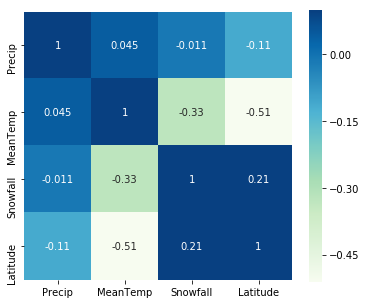

In [257]:
# 绘制各个变量相关系数热力图
plt.figure(figsize=(6,5))
foo = sns.heatmap(data.drop(['SE_1','SE_2','SE_3'],axis=1).corr(), vmax=0.1, square=True, annot=True,cmap = 'GnBu')

由图可以看出，平均气温和纬度相关性最大；自变量之间相关性较小，基本不存在共线性

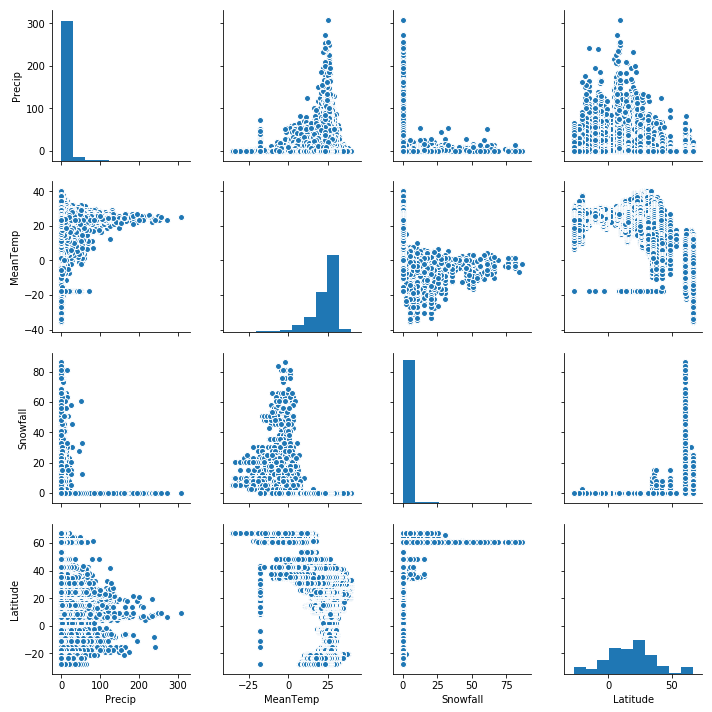

In [263]:
%matplotlib inline
sns.pairplot(data.drop(['SE_1','SE_2','SE_3'],axis=1))

## 4. 回归分析

本案例将进行回归分析的对象是：

- 因变量：Latitute
- 自变量：Precip,MeanTemp,Snowfall,SE_1,SE_2,SE_3

建立线性模型：  
$$\widehat{Latitute}=\beta_0+\beta_1Precip+\beta_2MeanTemp+\beta_3Snowfall+\beta_4SE_1+\beta_5SE_2+\beta_6SE_3$$  
拟采用OLS方法进行拟合

In [268]:
import sys
import statsmodels.api as sm
X1 = data.iloc[:,0:6]  # 选取自变量
X1=sm.add_constant(X1)  # 为模型添加常数项
Y1 = data.iloc[:,6]    # 选取因变量
est = sm.OLS(Y1,X1).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     6747.
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:41:40   Log-Likelihood:            -4.1805e+05
No. Observations:               99656   AIC:                         8.361e+05
Df Residuals:                   99649   BIC:                         8.362e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.1669      0.177    238.610      0.0

由此得到线性模型结果为：
$$Latitute=42.17-0.16Precip-1.27MeanTemp+0.34Snowfall+4.26SE_1+7.19SE_2+5.18SE_3$$